In [59]:

# Gantt Charts provides a visual view of tasks scheduled over time.  A Gantt chart is used for 
# planning projects of all sizes, and it is a useful way of showing what work is scheduled to be 
# done on a specific day. It can also help you view the start and end dates of a project 
# in one simple chart.


In [99]:
import pandas as pd

df = pd.read_csv('C:\\your_path_here\\project_dates.csv')
df.dtypes


State      object
Subtask    object
Begin      object
End        object
dtype: object

In [100]:

# convert multiple dates in one go.

df[["Begin", "End"]] = df[["Begin", "End"]].apply(pd.to_datetime)
df.dtypes


State              object
Subtask            object
Begin      datetime64[ns]
End        datetime64[ns]
dtype: object

In [101]:

# If the names of the columns in the original dataframe don't come to us as 'Start', 'Finish', and 'Task', 
# we need to rename them to 'Start', 'Finish', and 'Task' for the code, shown below, to work.
# In this dataframe, the columns are named 'Begin', 'End', and 'State'.  Let's rename them now!

df.rename(columns = {"Begin": "Start"}, inplace=True)
df.rename(columns = {"End": "Finish"}, inplace=True)
df.rename(columns = {"State": "Task"}, inplace=True)
df.head()


,Task,Subtask,Start,Finish
0,Washington,Part2,2010-11-11,2021-11-21
1,Colorado,Part1,2019-11-17,2021-12-06
2,New York,Part3,2020-12-01,2021-01-08
3,California,Part2,2019-11-24,2020-12-09
4,New York,Part1,2015-11-30,2023-12-22


In [116]:

# Let's count the number of unique 'Tasks' in our list and randomly generate some colors for the bars
# that indicate the timeline of each project.

n = df.Task.nunique()

import matplotlib, random

hex_colors_dic = {}
rgb_colors_dic = {}
hex_colors_only = []
for name, hex in matplotlib.colors.cnames.items():
    hex_colors_only.append(hex)
    hex_colors_dic[name] = hex
    rgb_colors_dic[name] = matplotlib.colors.to_rgb(hex)

color = random.sample(hex_colors_only, n)
color

['#8B008B', '#9370DB', '#CD5C5C', '#6B8E23']

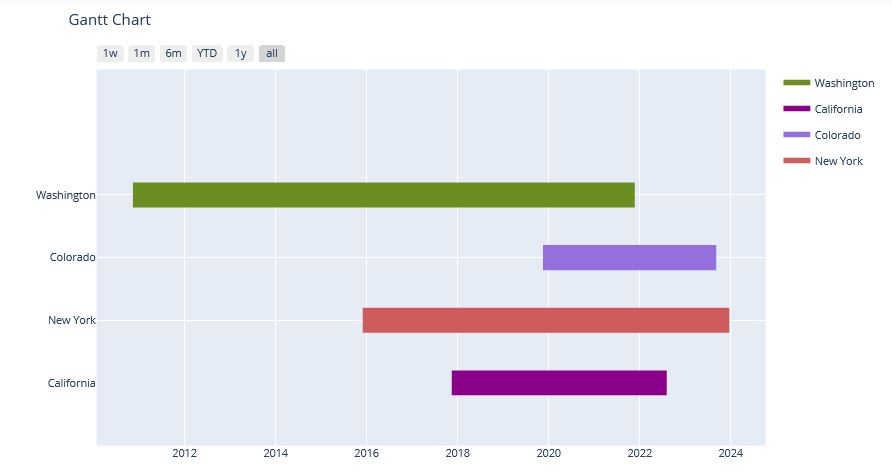

In [120]:

import plotly.express as px
import pandas as pd
import plotly.figure_factory as ff

fig = ff.create_gantt(df, colors=color, index_col='Task',
                      show_colorbar=True, bar_width=0.2, 
                      showgrid_x=True, showgrid_y=True, 
                      group_tasks=True, show_hover_fill=True)
fig.show()

from IPython.display import Image
Image(filename='C:/Users/ryans/OneDrive/Desktop/1.jpg', width=1900)


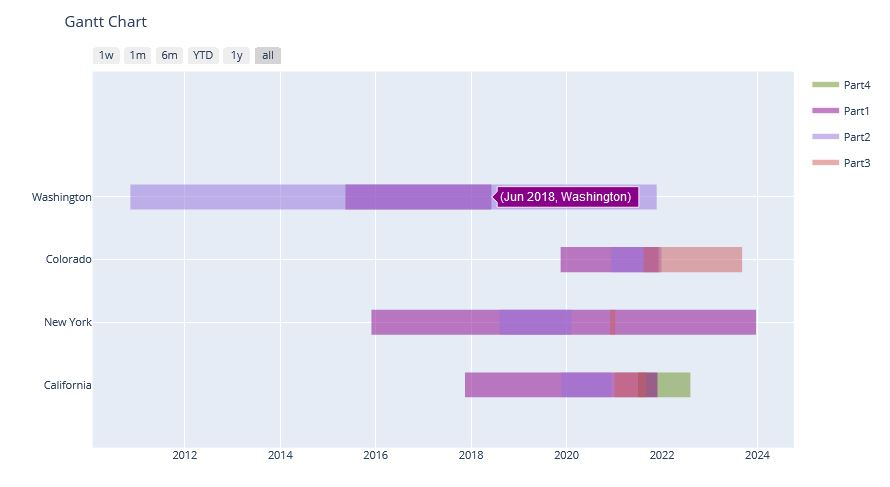

In [121]:

# Let's try one more view, with overlapping bars somewhat opaque, so we can see where dates overlap.

fig = ff.create_gantt(df, colors=color, index_col='Subtask',
                      show_colorbar=True, bar_width=0.2, 
                      showgrid_x=True, showgrid_y=True, 
                      group_tasks=True, show_hover_fill=True)
#print(fig['data'])
for shape in fig['data']:
    shape['opacity'] = 0.5
fig.show()

Image(filename='C:/Users/ryans/OneDrive/Desktop/2.jpg', width=1900)

In [ ]:

# There you go!  With just a bit of effort we were able to build some very useful Gantt Charts.
